<a href="https://colab.research.google.com/github/subadras/C-Programs/blob/main/23_12_2021_%5BMachine_Learning_Stroke_Prediction%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Modules and Observing Data**

In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import seaborn as sn #visualization
import plotly.offline as pyo
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (7).csv


In [ ]:
import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['healthcare-dataset-stroke-data.csv'].decode('utf-8')))

Finding null values and unique values.

In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI has 201 NULL values which will need to be corrected later.

In [ ]:
print("Total unique values in Residence_type column are: ",data['Residence_type'].nunique())
print("Unique values are: ",data['Residence_type'].unique())

Total unique values in Residence_type column are:  2
Unique values are:  ['Urban' 'Rural']


In [ ]:
print("Total unique values in work_type column are: ",data['work_type'].nunique())
print("Unique values are: ",data['work_type'].unique())

Total unique values in work_type column are:  5
Unique values are:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [ ]:
print("Total unique values in ever_married column are: ",data['ever_married'].nunique())
print("Unique values are: ",data['ever_married'].unique())

Total unique values in ever_married column are:  2
Unique values are:  ['Yes' 'No']


In [ ]:
print("Total unique values in smoking_status column are: ",data['smoking_status'].nunique())
print("Unique values are: ",data['smoking_status'].unique())

Total unique values in smoking_status column are:  4
Unique values are:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


## **Exploratory Data Analysis (EDA)**

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


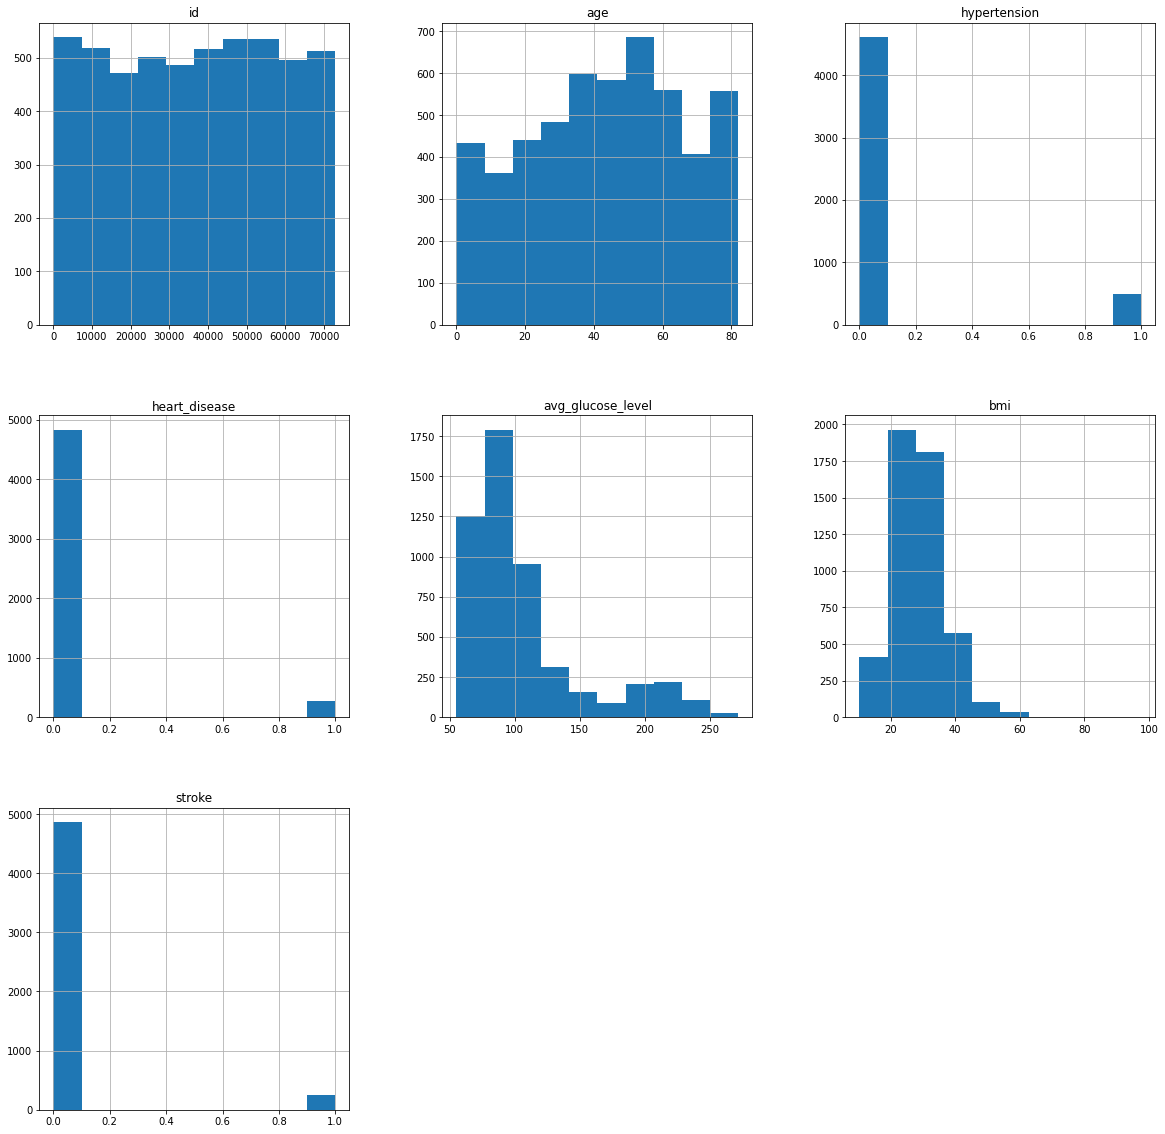

In [ ]:
data.hist(figsize = (20, 20))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



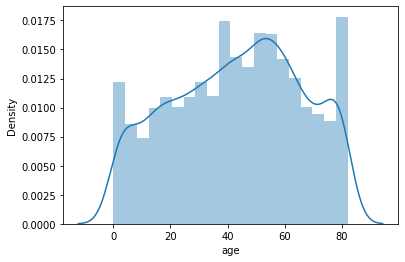

In [ ]:
sn.distplot(data['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



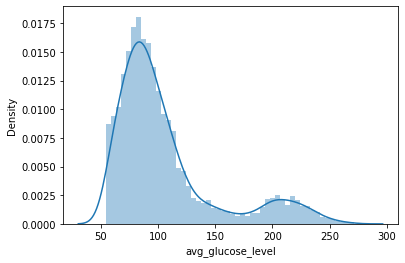

In [ ]:
sn.distplot(data['avg_glucose_level'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



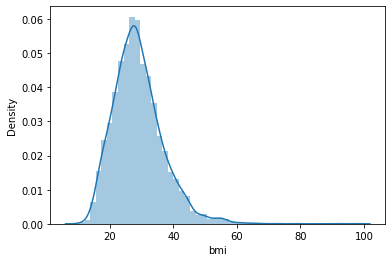

In [ ]:
sn.distplot(data['bmi'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



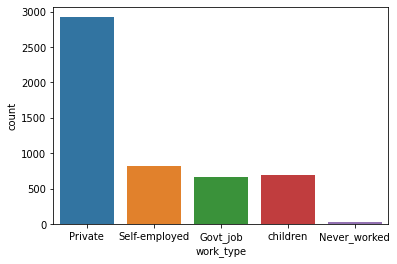

In [ ]:
sn.countplot(data['work_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



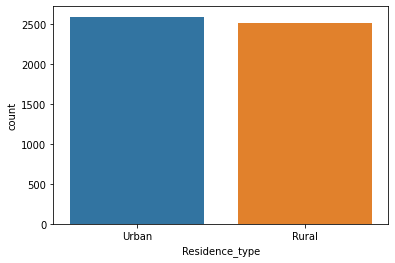

In [ ]:
sn.countplot(data['Residence_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



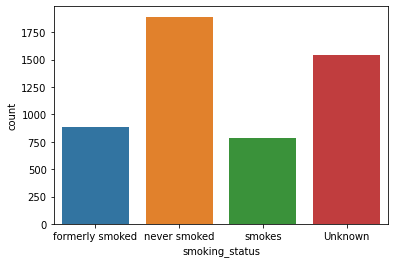

In [ ]:
sn.countplot(data['smoking_status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



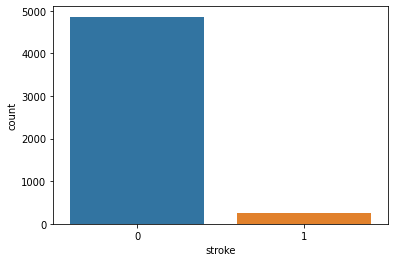

In [ ]:
sn.countplot(data['stroke'])

Note: This target is highly unbalanced and so should be corrected.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



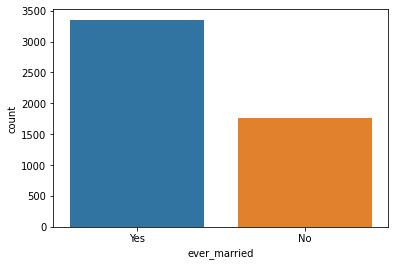

In [ ]:
sn.countplot(data['ever_married'])

In [ ]:
min_avg_glucose_level = min(data.avg_glucose_level)
max_avg_glucose_level = max(data.avg_glucose_level)
print(min_avg_glucose_level)
print(max_avg_glucose_level)

55.12
271.74


In [ ]:
interim_data = data['smoking_status'].value_counts().rename_axis('Smoking-Status').reset_index(name='Counts in each category of smoking status')
interim_data

,Smoking-Status,Counts in each category of smoking status
0,never smoked,1892
1,Unknown,1544
2,formerly smoked,885
3,smokes,789


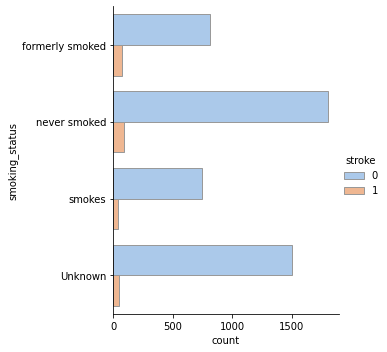

In [ ]:
sn.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

Here it can be seen that there is no significant correlation between ones smoking status and their chance of developing stroke, since the event of stroke is distributed over all statuses.

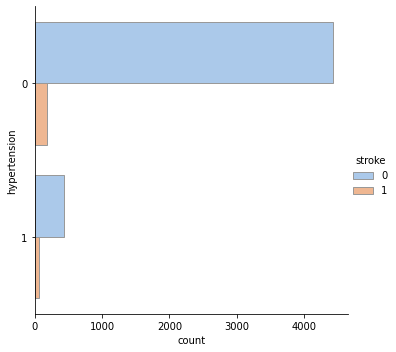

In [ ]:
sn.catplot(y="hypertension", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

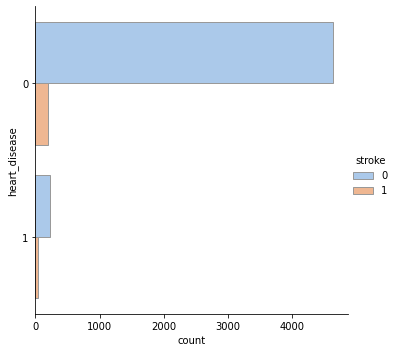

In [ ]:
sn.catplot(y="heart_disease", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

Here we can see that there is a clear correlation between the chance of developing stroke of the individual has a history of heart disease.

It can be seen that stroke does not directly correlate with smoking status but does correlate with a history of heart disease and hypertension.

In [ ]:
import plotly.express as px
fig = px.pie(data, values='avg_glucose_level', names='gender',title='Average level of glucose in Males and Females',width=800,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(data, values='hypertension', names='gender',title='Average level of glucose in Males and Females',width=800,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
interim_data = data['work_type'].value_counts().rename_axis('Type of Work').reset_index(name='Number of people working in each category')
interim_data

,Type of Work,Number of people working in each category
0,Private,2925
1,Self-employed,819
2,children,687
3,Govt_job,657
4,Never_worked,22


In [ ]:
gender_corr = data.filter(['gender','heart_disease','hypertension'])
gender_corr

,gender,heart_disease,hypertension
0,Male,1,0
1,Female,0,0
2,Male,1,0
3,Female,0,0
4,Female,0,1
...,...,...,...
5105,Female,0,1
5106,Female,0,0
5107,Female,0,0
5108,Male,0,0


In [ ]:
gender_corr = gender_corr.groupby('gender').count().reset_index()
gender_corr

,gender,heart_disease,hypertension
0,Female,2994,2994
1,Male,2115,2115
2,Other,1,1


## **Data Fixing & Feature Selection Process**

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


BMI has 201 NULL values I'll substitute the null values using the following commands:

In [ ]:
avg = data['bmi'].mean()
avg

28.893236911794673

In [ ]:
data.bmi=(data.bmi.fillna(28.90))

In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Since logistic regression cannot calculate any categorical data, categorial values must be converted into numerical values (using mapping).

My categorical data columns are: 

*   gender
*   ever_married
*   work_type
*   residence_type
*   smoking_status


In [ ]:
data['work_type'] = data['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

In [ ]:
data['gender'] = data['gender'].map({'Male':0, 'Female':1})

In [ ]:
data['Residence_type'] = data['Residence_type'].map({'Urban':0, 'Rural':1})

In [ ]:
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

In [ ]:
data['ever_married'] = data['ever_married'].map({'Yes':0, 'No':1})

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,51676,1.0,61.0,0,0,0,1,1,202.21,28.9,1,1
2,31112,0.0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,60182,1.0,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1665,1.0,79.0,1,0,0,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,0,0,0,83.75,28.9,1,0
5106,44873,1.0,81.0,0,0,0,1,0,125.20,40.0,1,0
5107,19723,1.0,35.0,0,0,0,1,1,82.99,30.6,1,0
5108,37544,0.0,51.0,0,0,0,0,1,166.29,25.6,0,0


Earlier, it was noted that the stroke variable is highly imbalanced and thus should be balanced for proper evaluation.

Methods like minority oversampling would be appropriate so I will try using SMOTE (synthetic minority oversampling technique) to balance the data.

Before implementing SMOTE, the data contains many different variables in different scales which will not allow functions like SMOTE to run so you can standardize/scale these values using Standard Scaler from scikit. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5109 non-null   float64
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 479.2 KB


In [ ]:
data_features = ['age',
 'id',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']

data_target = ['stroke']

x = data[data_features]
y = data[data_target]

Double check x for null or infinity values.

In [ ]:
x.isnull().sum()

age                  0
id                   0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               1
work_type            0
smoking_status       0
dtype: int64

In [ ]:
x.gender=(x.gender.fillna(1))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x.isnull().sum()

age                  0
id                   0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               0
work_type            0
smoking_status       0
dtype: int64

Data frame now contains no null values. We can proceed with SMOTE implementation.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
#Oversampling the data (x,y)
x_smote, y_smote = smote.fit_resample(x, y)

After oversampling the data, we can proceed with splitting the data into training, testing and validation sets.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.33,random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

The id column can be removed when training the data (since it is not considered data, but merely an identifier).

In [ ]:
x_train = x_train.drop(columns=['id'])
x_test = x_test.drop(columns=['id'])

Applying standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression as lr


In [ ]:
pipe = make_pipeline(StandardScaler(), lr())
pipe.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

At this stage, I can apply various feature selection tests to check for dependent variables.

## **Model Building**

In [ ]:
print("Model Accuracy on Testing Data: ", pipe.score(x_test,y_test))

Model Accuracy on Testing Data:  0.821183800623053


In [ ]:
pipe.predict(x_test)

array([0, 0, 0, ..., 1, 1, 0])

predict_proba() basically returns probabilities of a classification label.
https://dev.to/rajat_naegi/simply-explained-predictproba-263i

In [ ]:
x_test_proba=pipe.predict_proba(x_test)
x_test_proba

array([[0.80853489, 0.19146511],
       [0.98962262, 0.01037738],
       [0.97498996, 0.02501004],
       ...,
       [0.2198513 , 0.7801487 ],
       [0.38713758, 0.61286242],
       [0.83385635, 0.16614365]])

In [ ]:
y_pred = pipe.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['No chance of developing stroke', 'Chance of developing stroke']
print(classification_report(y_test, y_pred, target_names=target_names))

                                precision    recall  f1-score   support

No chance of developing stroke       0.85      0.79      0.81       803
   Chance of developing stroke       0.80      0.86      0.83       802

                      accuracy                           0.82      1605
                     macro avg       0.82      0.82      0.82      1605
                  weighted avg       0.82      0.82      0.82      1605



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



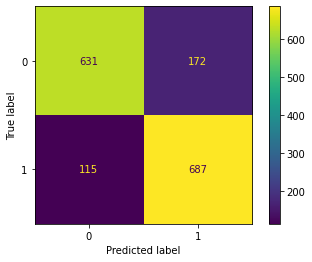

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipe,x_test,y_test)

In [ ]:
print("Training set score: {:.3f}".format(pipe.score(x_train,y_train)))
print("Test set score: {:.3f}".format(pipe.score(x_test,y_test)))

import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Training set score: 0.823
Test set score: 0.821


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Optimization terminated successfully.
         Current function value: 0.176293
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5099
Method:                           MLE   Df Model:                           10
Date:                Thu, 23 Dec 2021   Pseudo R-squ.:                 0.09479
Time:                        06:36:24   Log-Likelihood:                -900.85
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 3.711e-35
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0300      0.004      7.997      0.000       0.023       0.037
id      


> Training set score: 0.818


> Test set score: 0.819


This shows us we were able to avoid overfitting in the model.

## **Final DF Training and Scale Addition**

I will now attempt to merge the predict() results with my original dataframe

---



In [ ]:
x_test_proba

array([[0.80853489, 0.19146511],
       [0.98962262, 0.01037738],
       [0.97498996, 0.02501004],
       ...,
       [0.2198513 , 0.7801487 ],
       [0.38713758, 0.61286242],
       [0.83385635, 0.16614365]])

In [ ]:
df = data
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,51676,1.0,61.0,0,0,0,1,1,202.21,28.9,1,1
2,31112,0.0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,60182,1.0,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1665,1.0,79.0,1,0,0,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,0,0,0,83.75,28.9,1,0
5106,44873,1.0,81.0,0,0,0,1,0,125.20,40.0,1,0
5107,19723,1.0,35.0,0,0,0,1,1,82.99,30.6,1,0
5108,37544,0.0,51.0,0,0,0,0,1,166.29,25.6,0,0


In [ ]:
df_features = ['age',
 'id',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']

df_target = ['stroke']

x1 = df[df_features]
y1 = df[df_target]

In [ ]:
x1.isnull().sum()

age                  0
id                   0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               1
work_type            0
smoking_status       0
dtype: int64

In [ ]:
x1.gender=(x1.gender.fillna(1))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x1.isnull().sum()

age                  0
id                   0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               0
work_type            0
smoking_status       0
dtype: int64

In [ ]:
x_final, y_final = smote.fit_resample(x1, y1)

In [ ]:
x_final = x_final.drop(columns=['id'])

In [ ]:
x_final

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender,work_type,smoking_status
0,67.000000,0,1,0,0,228.690000,36.600000,0.000000,0,0
1,61.000000,0,0,0,1,202.210000,28.900000,1.000000,1,1
2,80.000000,0,1,0,1,105.920000,32.500000,0.000000,0,1
3,49.000000,0,0,0,0,171.230000,34.400000,1.000000,0,2
4,79.000000,1,0,0,1,174.120000,24.000000,1.000000,1,1
...,...,...,...,...,...,...,...,...,...,...
9717,79.231666,0,0,0,0,135.236704,23.862992,0.768334,0,2
9718,51.069961,0,0,0,0,165.511670,28.917338,1.000000,0,0
9719,58.208381,0,0,0,0,95.982849,36.160257,0.080559,0,2
9720,65.597446,0,0,0,0,85.510214,24.822850,0.452285,0,3


In [ ]:
model = lr()
model.fit(x_final, y_final)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
print("Model Accuracy on Testing Data: ", model.score(x_final,y_final))

Model Accuracy on Testing Data:  0.8226702324624563


In [ ]:
x1_proba=model.predict_proba(x_final)
x1_proba

array([[0.17609448, 0.82390552],
       [0.52313148, 0.47686852],
       [0.4731561 , 0.5268439 ],
       ...,
       [0.3707739 , 0.6292261 ],
       [0.32348947, 0.67651053],
       [0.28195188, 0.71804812]])

In [ ]:
model.predict(x_final)

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
print("Final DF score: {:.3f}".format(model.score(x_final,y_final)))

import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Final DF score: 0.823
Optimization terminated successfully.
         Current function value: 0.176293
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5099
Method:                           MLE   Df Model:                           10
Date:                Thu, 23 Dec 2021   Pseudo R-squ.:                 0.09479
Time:                        06:37:11   Log-Likelihood:                -900.85
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 3.711e-35
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0300      0.004      7.997      0.000       0.02

Now I will integrate the probability values as a 2 different columns in my df dataframe.

In [ ]:
x_final = pd.concat([x_final, pd.DataFrame(x1_proba)], axis=1)

In [ ]:
x_final

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender,work_type,smoking_status,0,1
0,67.000000,0,1,0,0,228.690000,36.600000,0.000000,0,0,0.176094,0.823906
1,61.000000,0,0,0,1,202.210000,28.900000,1.000000,1,1,0.523131,0.476869
2,80.000000,0,1,0,1,105.920000,32.500000,0.000000,0,1,0.473156,0.526844
3,49.000000,0,0,0,0,171.230000,34.400000,1.000000,0,2,0.444899,0.555101
4,79.000000,1,0,0,1,174.120000,24.000000,1.000000,1,1,0.373692,0.626308
...,...,...,...,...,...,...,...,...,...,...,...,...
9717,79.231666,0,0,0,0,135.236704,23.862992,0.768334,0,2,0.077455,0.922545
9718,51.069961,0,0,0,0,165.511670,28.917338,1.000000,0,0,0.231888,0.768112
9719,58.208381,0,0,0,0,95.982849,36.160257,0.080559,0,2,0.370774,0.629226
9720,65.597446,0,0,0,0,85.510214,24.822850,0.452285,0,3,0.323489,0.676511


In [ ]:
print(x_final.columns)

Index([              'age',      'hypertension',     'heart_disease',
            'ever_married',    'Residence_type', 'avg_glucose_level',
                     'bmi',            'gender',         'work_type',
          'smoking_status',                   0,                   1],
      dtype='object')


In [ ]:
x_final.rename(columns = { 0:'p_stroke' , 1:'p_nostroke'}, inplace = True)


In [ ]:
x_final

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender,work_type,smoking_status,p_stroke,p_nostroke
0,67.000000,0,1,0,0,228.690000,36.600000,0.000000,0,0,0.176094,0.823906
1,61.000000,0,0,0,1,202.210000,28.900000,1.000000,1,1,0.523131,0.476869
2,80.000000,0,1,0,1,105.920000,32.500000,0.000000,0,1,0.473156,0.526844
3,49.000000,0,0,0,0,171.230000,34.400000,1.000000,0,2,0.444899,0.555101
4,79.000000,1,0,0,1,174.120000,24.000000,1.000000,1,1,0.373692,0.626308
...,...,...,...,...,...,...,...,...,...,...,...,...
9717,79.231666,0,0,0,0,135.236704,23.862992,0.768334,0,2,0.077455,0.922545
9718,51.069961,0,0,0,0,165.511670,28.917338,1.000000,0,0,0.231888,0.768112
9719,58.208381,0,0,0,0,95.982849,36.160257,0.080559,0,2,0.370774,0.629226
9720,65.597446,0,0,0,0,85.510214,24.822850,0.452285,0,3,0.323489,0.676511


In [ ]:
conditions = [
    (x_final['p_stroke'] < 0.33),
    (x_final['p_stroke'] >= 0.33) & (x_final['p_stroke'] < 0.66),
    (x_final['p_stroke'] >= 0.66)
]

values = ['Low Risk', 'Moderate Risk', 'High Risk']

In [ ]:
x_final['stroke_risk'] = np.select(conditions, values)

In [ ]:
x_final

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender,work_type,smoking_status,p_stroke,p_nostroke,stroke_risk
0,67.000000,0,1,0,0,228.690000,36.600000,0.000000,0,0,0.176094,0.823906,Low Risk
1,61.000000,0,0,0,1,202.210000,28.900000,1.000000,1,1,0.523131,0.476869,Moderate Risk
2,80.000000,0,1,0,1,105.920000,32.500000,0.000000,0,1,0.473156,0.526844,Moderate Risk
3,49.000000,0,0,0,0,171.230000,34.400000,1.000000,0,2,0.444899,0.555101,Moderate Risk
4,79.000000,1,0,0,1,174.120000,24.000000,1.000000,1,1,0.373692,0.626308,Moderate Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,79.231666,0,0,0,0,135.236704,23.862992,0.768334,0,2,0.077455,0.922545,Low Risk
9718,51.069961,0,0,0,0,165.511670,28.917338,1.000000,0,0,0.231888,0.768112,Low Risk
9719,58.208381,0,0,0,0,95.982849,36.160257,0.080559,0,2,0.370774,0.629226,Moderate Risk
9720,65.597446,0,0,0,0,85.510214,24.822850,0.452285,0,3,0.323489,0.676511,Low Risk


In [ ]:
x_final.groupby(['stroke_risk']).size()

stroke_risk
High Risk        3586
Low Risk         4112
Moderate Risk    2024
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



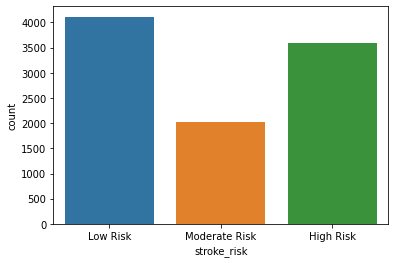

In [ ]:
sn.countplot(x_final['stroke_risk'])

## API